In [2]:
import os, shutil
from keras import models
from keras import layers

In [3]:
###########1. LOADING DATA
original_dataset_dir='C:\\Users\\hp\\Downloads\\Compressed\\dogs-vs-cats'
original_dataset_train_dir='C:\\Users\\hp\\Downloads\\Compressed\\dogs-vs-cats\\train'
original_dataset_test_dir='C:\\Users\\hp\\Downloads\\Compressed\\dogs-vs-cats\\test1'

In [4]:
#the directory where you will store the smaller dataset
base_dir = 'C:\\Users\\hp\\Downloads\\Compressed\\cats_and_dogs_small'
os.mkdir(base_dir)

In [5]:
#the directories for training , validation and test data
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [6]:
#Directory with cat training pictures
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
#Directory with dog training pictures
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
#Directory with cat validation pictures

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#Directory with dog validation pictures

validation_dogs_dir= os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
#Directory with cat testing pictures

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#Directory with dog testing pictures
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [10]:
#copy the first 6500 cat images to train_cats_dir
fnames=['cat.{}.jpg'.format(i) for i in range(6500)]
for fname in fnames:
    src=os.path.join(original_dataset_train_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [13]:
#copy the next 3000 cat images to validate_cats_dir
fnames=['cat.{}.jpg'.format(i) for i in range(6500,9500)]
for fname in fnames:
    src=os.path.join(original_dataset_train_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [14]:
#copy the next 3000 cat images to test_cats_dir
fnames=['cat.{}.jpg'.format(i) for i in range(9500,12500)]
for fname in fnames:
    src=os.path.join(original_dataset_train_dir,fname)
    dst=os.path.join(test_cats_dir ,fname)
    shutil.copyfile(src,dst)

In [15]:
#copy the first 6500 dog images to train_cats_dir
fnames=['dog.{}.jpg'.format(i) for i in range(6500)]
for fname in fnames:
    src=os.path.join(original_dataset_train_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [16]:
#copy the next 3000 dog images to validate_cats_dir
fnames=['dog.{}.jpg'.format(i) for i in range(6500,9500)]
for fname in fnames:
    src=os.path.join(original_dataset_train_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [17]:
#copy the next 3000 cat images to test_cats_dir
fnames=['dog.{}.jpg'.format(i) for i in range(9500,12500)]
for fname in fnames:
    src=os.path.join(original_dataset_train_dir,fname)
    dst=os.path.join(test_dogs_dir ,fname)
    shutil.copyfile(src,dst)

In [19]:
########BUILDING THE NETWORK

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [25]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',              
             metrics=['accuracy'])

In [26]:
##############DATA PREPROCESSING
from keras.preprocessing.image import ImageDataGenerator
#rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,# this is the target directory
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                     target_size=(150,150),
                                                     batch_size=20,
                                                     class_mode='binary')

Found 13000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [27]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

C:\Users\hp\AppData\Local\Temp\ipykernel_15804\984291649.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/30
100/100 [==============================] - 137s 1s/step - loss: 0.7520 - accuracy: 0.5225 - val_loss: 0.6884 - val_accuracy: 0.5210
Epoch 2/30
100/100 [==============================] - 130s 1s/step - loss: 0.7009 - accuracy: 0.5585 - val_loss: 0.6494 - val_accuracy: 0.6040
Epoch 3/30
100/100 [==============================] - 128s 1s/step - loss: 0.6659 - accuracy: 0.6215 - val_loss: 0.6741 - val_accuracy: 0.5450
Epoch 4/30
100/100 [==============================] - 130s 1s/step - loss: 0.6405 - accuracy: 0.6485 - val_loss: 0.6193 - val_accuracy: 0.6480
Epoch 5/30
100/100 [==============================] - 130s 1s/step - loss: 0.5784 - accuracy: 0.6995 - val_loss: 0.5635 - val_accuracy: 0.7200
Epoch 6/30
100/100 [==============================] - 131s 1s/step - loss: 0.5812 - accuracy: 0.6970 - val_loss: 1.7389 - val_accuracy: 0.5150
Epoch 7/30
100/100 [==============================] - 130s 1s/step - loss: 0.5841 - accuracy: 0.7050 - val_loss: 0.5812 - val_accuracy: 0.6980

In [28]:
 #it is always a good practice to save the model
model.save('cats_and_dogs_small_1.h5')

In [34]:
#####VISUALIZATION
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


Text(0.5, 1.0, 'Training Loss vs Validation Loss')

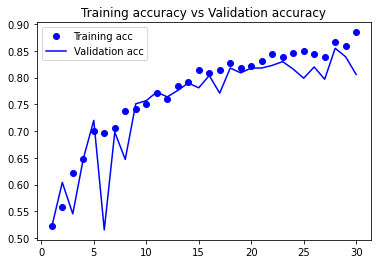

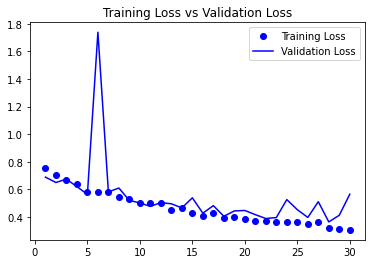

In [36]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo')
plt.plot(epochs,val_acc,'b')
plt.legend(['Training acc','Validation acc'])
plt.title('Training accuracy vs Validation accuracy')
plt.figure()
plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'b')
plt.legend(['Training Loss','Validation Loss'])
plt.title('Training Loss vs Validation Loss')

In [37]:
#data augmentation
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest'
)

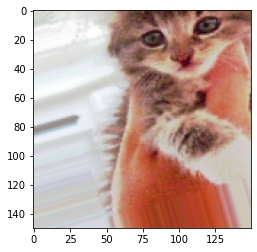

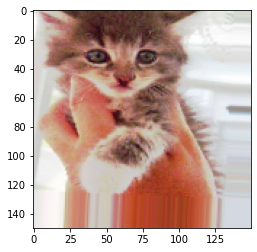

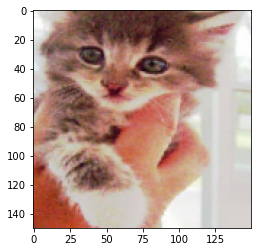

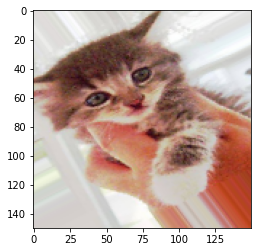

In [38]:
#viewing some randomly generated images
from keras.preprocessing import image
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+ x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [39]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [17]:
##training the convnet using data-augmented generators
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

)
test_datagen = ImageDataGenerator(rescale=1./255) #should not be augmented


In [42]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=320,
    class_mode='binary'

)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=320,
    class_mode='binary')

Found 13000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [43]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 799s 8s/step - loss: 0.8257 - accuracy: 0.5148 - val_loss: 0.6911 - val_accuracy: 0.5043


In [4]:
from keras.applications.vgg16 import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [22]:
###extracting features using the pretrained convolutional base
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:\\Users\\hp\\Downloads\\Compressed\\cats_and_dogs_small'
train_dir ='C:\\Users\\hp\\Downloads\\Compressed\\cats_and_dogs_small\\train' 
validation_dir ='C:\\Users\\hp\\Downloads\\Compressed\\cats_and_dogs_small\\validation'
test_dir ='C:\\Users\\hp\\Downloads\\Compressed\\cats_and_dogs_small\\test'


In [8]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

In [9]:
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,
                                         target_size=(150,150),
                                         batch_size=batch_size,
                                         class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break #Note that because generators yield data indefinitely in a loop,you must break after every image has been seen once.
            
    return features,labels


In [10]:
train_features, train_labels = extract_features(train_dir, 6500)
validation_features, validation_labels = extract_features(validation_dir,3000)
test_features, test_labels = extract_features(test_dir, 3000)
##this model takes about two hours to train

Found 13000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [11]:
#flattening the extracted features before feeding them to a neural network
train_features=np.reshape(train_features,(6500,4*4*512))
validation_features=np.reshape(validation_features,(3000,4*4*512))
test_features=np.reshape(test_features,(3000,4*4*512))


In [12]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',              
             metrics=['accuracy'])


In [14]:
history = model.fit(train_features, train_labels,
            epochs=30,
            batch_size=20,
            validation_data=(validation_features, validation_labels))
##this will be fast

Epoch 1/30
325/325 [==============================] - 15s 42ms/step - loss: 0.4734 - accuracy: 0.8143 - val_loss: 0.5795 - val_accuracy: 0.7480
Epoch 2/30
325/325 [==============================] - 14s 43ms/step - loss: 0.3068 - accuracy: 0.8715 - val_loss: 0.3054 - val_accuracy: 0.8820
Epoch 3/30
325/325 [==============================] - 13s 40ms/step - loss: 0.2720 - accuracy: 0.8892 - val_loss: 0.2823 - val_accuracy: 0.8943
Epoch 4/30
325/325 [==============================] - 17s 51ms/step - loss: 0.2485 - accuracy: 0.9042 - val_loss: 0.2682 - val_accuracy: 0.8930
Epoch 5/30
325/325 [==============================] - 18s 55ms/step - loss: 0.2304 - accuracy: 0.9086 - val_loss: 0.3220 - val_accuracy: 0.8780
Epoch 6/30
325/325 [==============================] - 13s 41ms/step - loss: 0.2033 - accuracy: 0.9188 - val_loss: 0.4022 - val_accuracy: 0.8590
Epoch 7/30
325/325 [==============================] - 14s 42ms/step - loss: 0.1902 - accuracy: 0.9283 - val_loss: 0.3104 - val_accuracy:

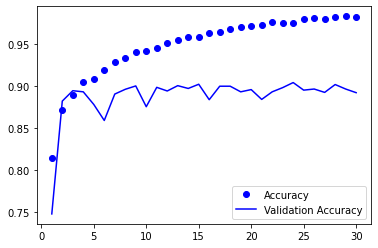

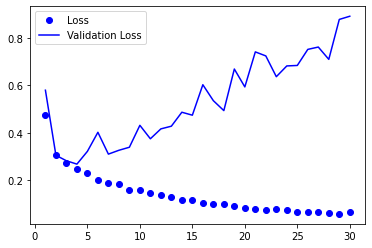

In [15]:
##viewing the accuracy visually
import matplotlib.pyplot as plt
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
val_loss=history.history['val_loss']
loss=history.history['loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.plot(epochs,val_acc,'b')
plt.legend(['Accuracy','Validation Accuracy'])

plt.figure()

plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'b')
plt.legend(['Loss','Validation Loss'])


In [33]:
###THIS IS THE SECOND APPROACH IN FEATURE EXTRACTION USING PRETRAINED MODELS
##Adding a densely connected layer to the top of our convolutional base
from keras import models
from keras import layers
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

          


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [35]:
##This avoids updating of weights during training which would disorient the whole thing
conv_base.trainable=False

In [36]:
##training the model with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')




Found 13000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [37]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',              
             metrics=['accuracy'])

In [38]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

C:\Users\hp\AppData\Local\Temp\ipykernel_5552\2724264653.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 2033s 20s/step - loss: 0.8583 - accuracy: 0.7010 - val_loss: 0.3430 - val_accuracy: 0.8470
Epoch 2/30
100/100 [==============================] - 1234s 12s/step - loss: 0.5338 - accuracy: 0.7475 - val_loss: 0.2861 - val_accuracy: 0.8710
Epoch 3/30
100/100 [==============================] - 1364s 14s/step - loss: 0.4585 - accuracy: 0.7830 - val_loss: 0.2662 - val_accuracy: 0.8780
Epoch 4/30
100/100 [==============================] - 1334s 13s/step - loss: 0.4146 - accuracy: 0.8030 - val_loss: 0.3115 - val_accuracy: 0.8690
Epoch 5/30
100/100 [==============================] - 1172s 12s/step - loss: 0.4093 - accuracy: 0.8230 - val_loss: 0.4808 - val_accuracy: 0.8040
Epoch 6/30
100/100 [==============================] - 1125s 11s/step - loss: 0.3833 - accuracy: 0.8260 - val_loss: 0.2743 - val_accuracy: 0.8730
Epoch 7/30
100/100 [==============================] - 1124s 11s/step - loss: 0.3822 - accuracy: 0.8260 - val_loss: 0.2909 - val_ac

# The model above took 9 hours to train on a CPU

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [42]:
##this code is for GPUs only
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False


In [44]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop'
metrics=['accuracy'])

SyntaxError: invalid syntax (2761013396.py, line 3)

In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

In [28]:
###now you can test the model
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')


Found 6000 images belonging to 2 classes.


In [39]:
test_generator

In [47]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 372s 7s/step - loss: 0.2482 - accuracy: 0.9090
test acc: 0.9089999794960022


In [48]:
model.save('final_cats_vs_dogs_convnet.h5')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
